# Part A.

A psychologist studying perceived “quality of life” in a large number of cities (N5150) came up with the following equation using mean temperature (Temp), median income in $1000 (Income), per capita expenditure on social services (Socser), and population density (Popul) as predictors.

$$\hat{Y}  = 5.37 - 0.01 Temp + 0.05 Income + 0.003 Socser - 0.01Popul$$

- Interpret the regression equation in terms of the coefficients.
- Assume there is a city that has a mean temperature of 55 degrees, a median income of $12,000, spends $500 per capita on social services, and has a population density of 200 people per block. What is its predicted quality of life score?
- What would we predict in a different city that was identical in every way except that it spent 100 USD per capita on social services?

- Assume that $\beta = [-0.438 ~~0.762 ~~ 0.081~~-0.132]$. Interpret the results.
- For the values of $\beta$, the corresponding standard errors are $[0.397~~ 0.252~~ 0.052~~ 0.025]$. Which, if any, predictor would you be most likely to drop if you wanted to refine your regression equation?

 Interpret the regression equation in terms of the coefficients:
 The formula indicates that, one degree decrease in Temp results in 0.01 decrease of quality of life(QOL), Every 1k dollar, increas in income results in 0.05 unit increase of QOL, Every 100 dolalr increase in Socser results in 0.003 unit increase in QOL, and every 100 person increase in population results in 0.01 decrease in QOL.

 Assume there is a city that has a mean temperature of 55 degrees, a median income of $12,000, spends $500 per capita on social services, and has a population density of 200 people per block. What is its predicted quality of life score?


$City_score = 5.37 - 0.01 * temp + 0.05 * income + 0.003 * socser - 0.01 * popul$

$City_score = 5.37 - 0.01(55) + 0.05 *(12000) + 0.003*(500) - 0.01*(200)$

In [7]:
City_score = 5.37 - 0.01*(55) + 0.05*(12) + 0.003*(500) - 0.01*(200)
City_score

[1] 4.92

#### What would we predict in a different city that was identical in every way except that it spent 100 USD per capita on social services?

In [8]:
City_score2 = 5.37 - 0.01*(55) + 0.05*(12) + 0.003*(100) - 0.01*(200)
City_score2

[1] 3.72

### Assume that $\beta = [-0.438 ~~0.762 ~~ 0.081~~-0.132]$. Interpret the results.

Temperature and quality of life have a negative correlation, as seen by the beta value of -0.438 for temperature. A lower expected quality of life score is correlated with a higher temperature, also the number 0.438 indicates that the temperature was 43.8 degrees.
Income and quality of life have a positive correlation, as seen by the income beta value of 0.762. A higher expected quality of life score is correlated with a greater income, and that the income was 15240$ for the given Beta value.
 Although social services and quality of life have a positive link, the beta value for social services (0.081) is substantially lower than the coefficient for income. This implies that although spending on social services has a beneficial effect, it is not as great as the effect of income, and that 
 Population density and quality of life are negatively correlated, as seen by the population density beta value of -0.132. A predicted quality of life score that is lower is correlated with a larger population density.
 These numbers help us understand how each factor contributes to the changes in the outcome, taking into account the different scales involved. For instance, Income has the most positive impact on Y, followed by Socser, while Temp and Popul have a bit of a downer effect.


 For the values of $\beta$, the corresponding standard errors are $[0.397~~ 0.252~~ 0.052~~ 0.025]$. Which, if any, predictor would you be most likely to drop if you wanted to refine your regression equation?

In [2]:
Beta = c(0.01, 0.05, 0.003, 0.01)
Standard_Error = c(0.397, 0.252, 0.052, 0.025)

t_stats = Beta / Standard_Error

t_stats

[1] 0.02518892 0.19841270 0.05769231 0.40000000

#### The indicator that I would drop would be Temperature. since it has the smallest absolute t statistic.

# Part B. 

A large corporation is interested in predicting a measure of job satisfaction among its employees. They collected data on 15 employees who each supplied information on job satisfaction, level of responsibility, number of people supervised, rating of working environment, and years of service. The data follow:

<img src="Images/p51.jpg" width="600"/>

The data are found in https://github.com/amanirad/Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics.

- Write out the regression equation using all five predictors.
- What are the $\beta$'s?
- Which variable has the largest semi-partial correlation with the criterion, partialling out the other variables?
- The overall $F$ is not significant, yet the Environment correlates significantly ($r=0.58$) with $Y$. How is this possible?
- Calculate the adjusted $R^2$ for the data

NOTE: Seems that there is problem with the question, we MUST  have a dependent variable in order to be able to compute correlations for it. whilst the question asks that all five columns provided in the data are all predictors.

In [20]:
library(tidyverse)
library(ggpubr)
library(ppcor)

In [3]:
job_satisfaction = read.table("C://Users//Saeed//Desktop//Amar//Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics-main//project_5_B.dat", header = TRUE)

In [4]:
job_satisfaction

Satisf,Respons,NumSuper,Environ,YearsService
<int>,<int>,<int>,<int>,<int>
2,4,5,1,5
2,2,3,1,7
3,3,4,7,5
3,6,7,3,3
5,2,4,5,3
5,8,8,8,6
6,4,6,5,3
6,5,5,5,2
6,8,9,6,7


In [5]:
multi_lm_satis = lm(Satisf ~ Respons + NumSuper + Environ + YearsService, data = job_satisfaction)

In [6]:
summary(multi_lm_satis)


Call:
lm(formula = Satisf ~ Respons + NumSuper + Environ + YearsService, 
    data = job_satisfaction)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1441 -1.0830  0.4068  1.1422  2.3796 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   1.66926    2.03155   0.822    0.430
Respons       0.60516    0.42784   1.414    0.188
NumSuper     -0.33399    0.53673  -0.622    0.548
Environ       0.48552    0.27610   1.758    0.109
YearsService  0.07023    0.26223   0.268    0.794

Residual standard error: 2.057 on 10 degrees of freedom
Multiple R-squared:  0.4864,	Adjusted R-squared:  0.2809 
F-statistic: 2.367 on 4 and 10 DF,  p-value: 0.1227


#### The $\beta$'s are the Estimate reported above, and Intercept Estimate value is the $\beta0$

#### Answer :By choosing Statisf column as the dependent variable we are able to calculate the $\beta$'s, and then write down the regression equation.

#### $Satisfaction = 1.66926 - 0.60516 * Responsibility -0.33399 * NumberSupervised + 0.4855 * Environment + 0.07023 * YearsOfService$

In [24]:
result = pcor(job_satisfaction[, c("Satisf", "Respons", "NumSuper", "Environ", "YearsService")], method = "spearman")

print(result$estimate)

                  Satisf    Respons    NumSuper     Environ YearsService
Satisf        1.00000000  0.3273571 -0.05960164  0.39579585   0.04231010
Respons       0.32735713  1.0000000  0.77999821 -0.26440819  -0.30881850
NumSuper     -0.05960164  0.7799982  1.00000000  0.45399540   0.23831378
Environ       0.39579585 -0.2644082  0.45399540  1.00000000   0.03643496
YearsService  0.04231010 -0.3088185  0.23831378  0.03643496   1.00000000


#### Answer: Apparently Environment has the largest semi-partial correlation with the criterion.

#### The overall $F$ is not significant, yet the Environment correlates significantly ($r=0.58$) with $Y$. How is this possible?

Answer: As I searched for possible explanations for this phenomenon, I found out that it might be due to small sample sizes, or due to multicollinearity of indicators.

## Calculate the adjusted $R^2$ for the data

#### The Adjusted R-squared:  0.2809, due to the report of lm function above.

# Part C.

One of the assumptions lying behind our use of regression is the assumption of homogeneity of variance in arrays. One way to examine the data for violations of this assumption is to calculate predicted values of Y and the corresponding residuals ($Y – \hat{Y}$). If you plot the residuals against the predicted values, you should see a more or less random collection of points. The vertical dispersion should not increase or decrease systematically as you move from right to left, nor should there be any other apparent pattern. Create the scatterplot for the data https://github.com/amanirad/Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics. Explain the assumption of homogeneity of variances in detail.

In [37]:
assumptions = read.table("C://Users//Saeed//Desktop//Amar//Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics-main//project_5_C.dat", header = TRUE)

In [38]:
assumptions

FamNum,SexP,SomTP,DepTP,AnxTP,HosTP,GSITP,SexS,SomTS,DepTS,AnxTS,HosTS,GSITS,SexChild,Intern,Extern,TotBP,InternT,ExternT,TotBPT
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
101,2,62,50,52,39,52,1,42,44,41,40,42,NA,NA,NA,NA,NA,NA,NA
104,1,56,65,55,40,57,2,53,73,68,67,71,1,11,12,28,58,57,60
105,1,56,57,67,65,61,2,41,67,63,66,65,2,7,7,15,47,48,45
106,2,41,61,64,53,57,1,60,60,59,67,62,1,6,10,15,49,52,48
107,2,61,61,52,56,57,1,42,44,50,61,50,1,10,11,25,58,57,58
108,1,56,53,55,53,53,2,65,70,70,53,69,NA,NA,NA,NA,NA,NA,NA
109,2,57,64,59,53,60,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
110,1,42,53,50,53,50,2,41,42,38,39,33,2,5,5,15,49,49,52
111,2,51,42,38,39,39,1,60,44,41,40,45,NA,NA,NA,NA,NA,NA,NA


In [39]:
library(imputeTS)

In [40]:
data_imputed = na_mean(assumptions)

In [41]:
data_imputed

FamNum,SexP,SomTP,DepTP,AnxTP,HosTP,GSITP,SexS,SomTS,DepTS,AnxTS,HosTS,GSITS,SexChild,Intern,Extern,TotBP,InternT,ExternT,TotBPT
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,2.000000,62.00000,50.00000,52.00000,39.00000,52.00000,1.000000,42.00000,44.00000,41.00,40.00,42.00000,1.463415,9.536585,12.09756,24.43902,52.68293,53.68293,53.58537
104,1.000000,56.00000,65.00000,55.00000,40.00000,57.00000,2.000000,53.00000,73.00000,68.00,67.00,71.00000,1.000000,11.000000,12.00000,28.00000,58.00000,57.00000,60.00000
105,1.000000,56.00000,57.00000,67.00000,65.00000,61.00000,2.000000,41.00000,67.00000,63.00,66.00,65.00000,2.000000,7.000000,7.00000,15.00000,47.00000,48.00000,45.00000
106,2.000000,41.00000,61.00000,64.00000,53.00000,57.00000,1.000000,60.00000,60.00000,59.00,67.00,62.00000,1.000000,6.000000,10.00000,15.00000,49.00000,52.00000,48.00000
107,2.000000,61.00000,61.00000,52.00000,56.00000,57.00000,1.000000,42.00000,44.00000,50.00,61.00,50.00000,1.000000,10.000000,11.00000,25.00000,58.00000,57.00000,58.00000
108,1.000000,56.00000,53.00000,55.00000,53.00000,53.00000,2.000000,65.00000,70.00000,70.00,53.00,69.00000,1.463415,9.536585,12.09756,24.43902,52.68293,53.68293,53.58537
109,2.000000,57.00000,64.00000,59.00000,53.00000,60.00000,1.393443,50.61667,54.56667,55.25,53.75,53.68333,1.463415,9.536585,12.09756,24.43902,52.68293,53.68293,53.58537
110,1.000000,42.00000,53.00000,50.00000,53.00000,50.00000,2.000000,41.00000,42.00000,38.00,39.00,33.00000,2.000000,5.000000,5.00000,15.00000,49.00000,49.00000,52.00000
111,2.000000,51.00000,42.00000,38.00000,39.00000,39.00000,1.000000,60.00000,44.00000,41.00,40.00,45.00000,1.463415,9.536585,12.09756,24.43902,52.68293,53.68293,53.58537


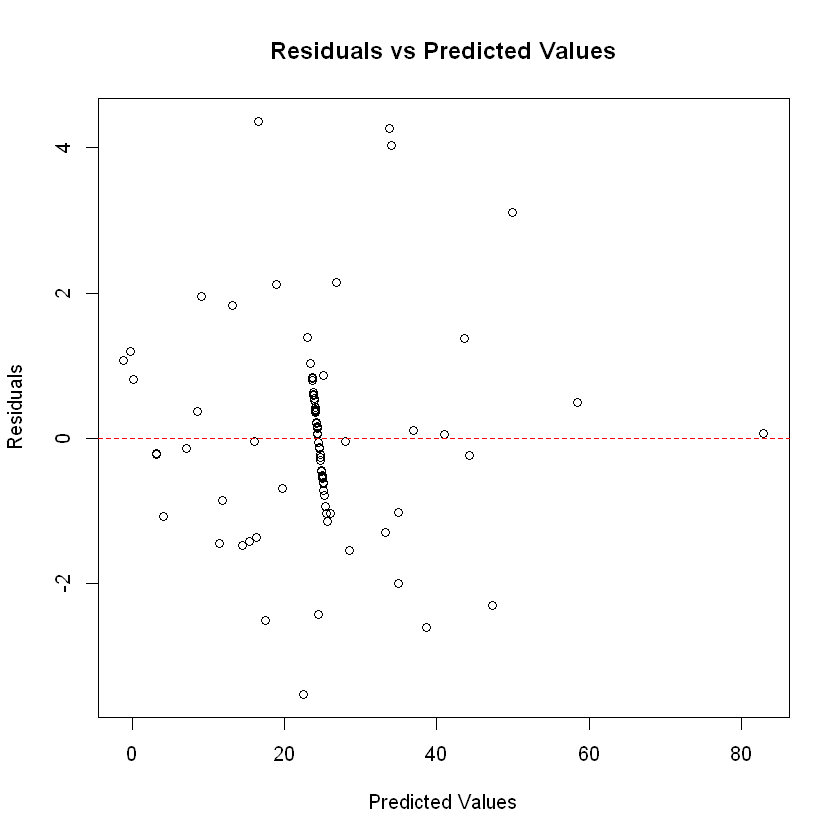

In [44]:
lm_model = lm(TotBP ~ SexP + SomTP + DepTP + AnxTP + HosTP + GSITP + SexS + SomTS + DepTS + AnxTS + HosTS + GSITS + SexChild + Intern + Extern + TotBPT, data = data_imputed)

predicted_values = fitted(lm_model)
residuals = residuals(lm_model)

plot(predicted_values, residuals, xlab = "Predicted Values", ylab = "Residuals", main = "Residuals vs Predicted Values")
abline(h = 0, col = "red", lty = 2) 

 Answer: I searched for possible explanations, I found out that if:
  1. Random Dispersion, 2. Constant Spread, and 3. No Funnel Shape, are met on the scatter plot, 
 then we can say that homogeneity of variances is met, but due to the shape of the scatter plot above, apparently the homogeneity is not met here. `